In [3]:
import pandas as pd
import numpy as np
import scipy
import random
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
symbols = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
def color_generator():
    color = '#'
    for i in range(6):
        index = 0
        for j in xrange(1000) :
            index = random.randint(0, 15)
        color += (symbols[index])
    return color

$\xi_{i}$ время меж- ду 𝑖-м моментом выходом из строя сервера и (𝑖+1)-м. 
Предполагается, что величины $\xi_{i}$ независимы в совокупности и имеют экспоненциальное распределение с парамет- ром $\lambda$ Т.е. $\xi_{i} \sim exp(\lambda)$
Для экспоненциального распределения, сопряженное - гамма с параметрами $(\alpha,\, \beta)$, а гиперпараметры апостериорного распределения будут  $\alpha+n,\, \beta+\sum_{i=1}^n x_i$

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/Gamma_distribution_pdf.svg">

In [5]:
real_lambda = 0.213

In [6]:
break_time = pd.read_csv('/Users/semenfedotov/Desktop/MathStats/6.1.txt')

In [7]:
break_time = np.asarray(break_time['0.213'])

In [8]:
break_time

array([  5.473,   5.878,  13.314,  16.023,  17.636,  21.098,  24.429,
        26.512,  26.941,  27.613,  28.751,  37.977,  42.647,  55.828,
        59.729])

In [18]:
events = [(t, True) for t in break_time] + [(i, False) for i in range(61)] 
events.sort()

Выберем параметры априорного распределения таковыми, чтобы у плотности Гамма распределения не было горба(т.к. мы не знаем ничего, как распределена $\lambda$), и возьмем $\beta$, чтобы график плотности был гладким. Если брать параметр $\alpha $ Из рисунка выше, нам подходит модель с априорным распределением $\Gamma(1,2)$

In [9]:
selection = [break_time[0]]

In [10]:
for i in range(len(break_time) - 1):
    selection.append(break_time[i + 1] - break_time[i])

In [11]:
selection

[5.4729999999999999,
 0.40499999999999936,
 7.4360000000000008,
 2.7089999999999996,
 1.6129999999999995,
 3.4620000000000033,
 3.3309999999999995,
 2.0829999999999949,
 0.42900000000000205,
 0.67200000000000415,
 1.1379999999999946,
 9.2259999999999991,
 4.6700000000000017,
 13.181000000000004,
 3.9009999999999962]

In [12]:
np.cumsum(selection)

array([  5.473,   5.878,  13.314,  16.023,  17.636,  21.098,  24.429,
        26.512,  26.941,  27.613,  28.751,  37.977,  42.647,  55.828,
        59.729])

In [13]:
alphas = [15.38837089,2,3,5,9,7.5,0.5]
betas = [1,2,2,1,0.5,1,1]

Оценкой $\theta $ будет $\frac{\alpha + n - 1}{\beta + \sum {X_{i}}}$

In [14]:
def evaluater(beta, alpha, sumka):
    return [(float(alpha) + float(i)) /(float(beta) + float(sumka[i])) for i in range(15)]

In [15]:
def make_eval(selection):
    sumki = np.cumsum(selection)
    res = []
    for i in range(len(alphas)):
        res.append(evaluater(alphas[i], betas[i], sumki))
    return res
        

In [16]:
evals = make_eval(selection)

In [17]:
evals

[[0.0479354882894755,
  0.09404519512731964,
  0.10452098230830158,
  0.12734242048867164,
  0.15140333836046013,
  0.16444496543898393,
  0.1758026671157745,
  0.1909290975252272,
  0.21261832648985066,
  0.23255072554734543,
  0.2492106203192875,
  0.22486492269931269,
  0.22400132540963935,
  0.19658401326886257,
  0.19968750000536659],
 [0.26763013515321826,
  0.38080731150038083,
  0.26119890296460757,
  0.27742329245963493,
  0.30556121409655734,
  0.30305654169192137,
  0.30269779408982556,
  0.3156565656565657,
  0.3455305621782247,
  0.3714584810725019,
  0.39023121199310595,
  0.3251869825149461,
  0.3135709006204224,
  0.2593899149201079,
  0.25919745986489334],
 [0.23604390416617493,
  0.3379139445821131,
  0.245188181929631,
  0.2628397203385376,
  0.29075402209730566,
  0.2904805378039671,
  0.2916621094462066,
  0.30496069395500136,
  0.33399018068868774,
  0.3593244699964067,
  0.3779408522566219,
  0.3172511408839105,
  0.30670142616163165,
  0.25498062147276807,
  0.2

In [66]:
dots = range(1, 16)

In [67]:
def draw_evals(evals):
    plt.figure(figsize=(15,5))
    for i in range(len(evals)):
        plt.plot(dots, map(abs, np.array(evals[i]) - real_lambda), color = color_generator(), label='params = ' + str(zip(alphas, betas)[i]))
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)

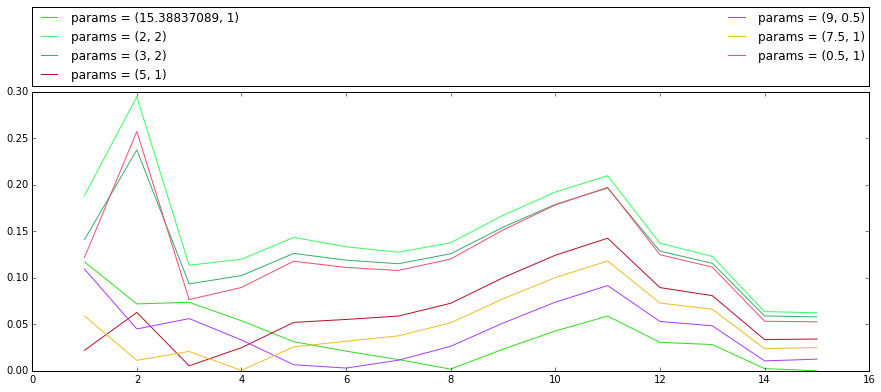

In [68]:
draw_evals(evals)

TODO podobrat norm parametry